<h1 style="text-align: center;">Part-of-Speech (POS) & Vectorization - Tutorial</h1> 

**Part-of-Speech (POS) tagging** typically comes **after tokenization** and **before syntactic parsing**. Here's the standard order in the text processing pipeline:

1. **Text Cleaning**  
   – Remove special characters, HTML tags, newlines, etc.

2. **Tokenization**  
   – Split text into sentences and then into words/tokens.

3. **Normalization**  
   – Lowercasing, removing stopwords, stemming/lemmatization.

4. <strong style="color: #2a9d8f;">Part-of-Speech Tagging</strong>   
   – Assign grammatical tags to each token (e.g., noun, verb, adjective).

5. **Syntactic Parsing**  
   * Build parse trees or dependency graphs using the POS tags.
   * POS tags are crucial **inputs** for syntactic parsers.
   * POS tags help disambiguate sentence structure (e.g., distinguishing between noun and verb uses of the same word).


## POS Tagging with NLTK

In [1]:
import nltk

# Download necessary resources
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

# Sample text
text = "The quick brown fox jumps over the lazy dog."

# Tokenize
tokens = nltk.word_tokenize(text)

# POS tagging
pos_tags = nltk.pos_tag(tokens)

print("NLTK POS Tags:")
for word, tag in pos_tags:
    print(f"{word}: {tag}")


[nltk_data] Downloading package punkt_tab to C:\Users\Khor Kean
[nltk_data]     Teng\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Khor Kean Teng\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


NLTK POS Tags:
The: DT
quick: JJ
brown: NN
fox: NN
jumps: VBZ
over: IN
the: DT
lazy: JJ
dog: NN
.: .


* Model Used: By default, nltk.pos_tag() uses the **Averaged Perceptron Tagger** (a type of linear classifier) trained on the Penn Treebank.
* Penn Treebank Tags: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html


## POS Tagging with spaCy

In [ ]:
#!python3 -m spacy download en_core_web_md

In [2]:
import spacy

# Load English model
nlp = spacy.load("en_core_web_md")

# Sample text
text = "The quick brown fox jumps over the lazy dog."

# Process the text
doc = nlp(text)

print("spaCy POS Tags:")
for token in doc:
    print(f"{token.text}: {token.pos_} ({token.tag_})")


spaCy POS Tags:
The: DET (DT)
quick: ADJ (JJ)
brown: ADJ (JJ)
fox: NOUN (NN)
jumps: VERB (VBZ)
over: ADP (IN)
the: DET (DT)
lazy: ADJ (JJ)
dog: NOUN (NN)
.: PUNCT (.)


* Model Used: **Neural network-based statistical model**
* **token.pos_** → Universal POS tags (from Universal Dependencies). Examples: NOUN, VERB, ADJ, ADV
* **token.tag_** → Fine-grained POS tags (from Penn Treebank / OntoNotes). Examples: NN, VBZ, JJ, RB

## Fine-Grained Tags and Explanations in spaCy

In [3]:
import spacy
from spacy import explain

# Load a spaCy model
nlp = spacy.load("en_core_web_md")

text = "Alice is reading a book in the quiet library."
doc = nlp(text)

# Display fine-grained POS tags and explanations
print("Fine-Grained POS Tags and Explanations:")
for token in doc:
    print(f"{token.text:<10} {token.tag_:<6} {explain(token.tag_)}")

Fine-Grained POS Tags and Explanations:
Alice      NNP    noun, proper singular
is         VBZ    verb, 3rd person singular present
reading    VBG    verb, gerund or present participle
a          DT     determiner
book       NN     noun, singular or mass
in         IN     conjunction, subordinating or preposition
the        DT     determiner
quiet      JJ     adjective (English), other noun-modifier (Chinese)
library    NN     noun, singular or mass
.          .      punctuation mark, sentence closer


## Filter Words by POS (e.g., Nouns only)

In [4]:
nouns = [token.text for token in doc if token.pos_ == "NOUN"]
print("Nouns in the sentence:", nouns)


Nouns in the sentence: ['book', 'library']


## Word Embedding in spaCy

In [16]:
import spacy

nlp = spacy.load("en_core_web_md") # pretrained word vectors included in en_core_web_md and en_core_web_lg

# Process a single word
word1 = nlp("king")
word2 = nlp("kings")
word3 = nlp("apple")

# Extract vector
vector = word1.vector

# Display vector shape and a sample
print(f"Vector shape: {vector.shape}")
print("Sample from the embedding vector:", vector[:10])  # First 10 values


Vector shape: (300,)
Sample from the embedding vector: [-0.60644   -0.51205    0.0064921 -0.29194   -0.56515   -0.11523
  0.077274   0.33561    0.11593    2.3516   ]


In [17]:
# spaCy similarity is cosine similarity
print(f"Similarity (king vs queen): {word1.similarity(word2):.4f}")
print(f"Similarity (king vs apple): {word1.similarity(word3):.4f}")

Similarity (king vs queen): 0.4466
Similarity (king vs apple): 0.2111


In [7]:
# These use average of word vectors, so they're fast but less context-sensitive.
sent1 = nlp("A cat sat on the mat.")
sent2 = nlp("A dog lay on the rug.")
sent3 = nlp("The stock market crashed yesterday.")

print(f"Sent1 vs Sent2: {sent1.similarity(sent2):.4f}")
print(f"Sent1 vs Sent3: {sent1.similarity(sent3):.4f}")


Sent1 vs Sent2: 0.8630
Sent1 vs Sent3: 0.6609


* In spaCy, the sentence embedding (or Doc-level .vector) is computed as **the average of the word embeddings** (excluding stopwords, punctuations, and sometimes out-of-vocabulary words depending on the model)

## Visualize Word Embeddings with PCA

In [ ]:
#!pip3 install matplotlib scikit-learn

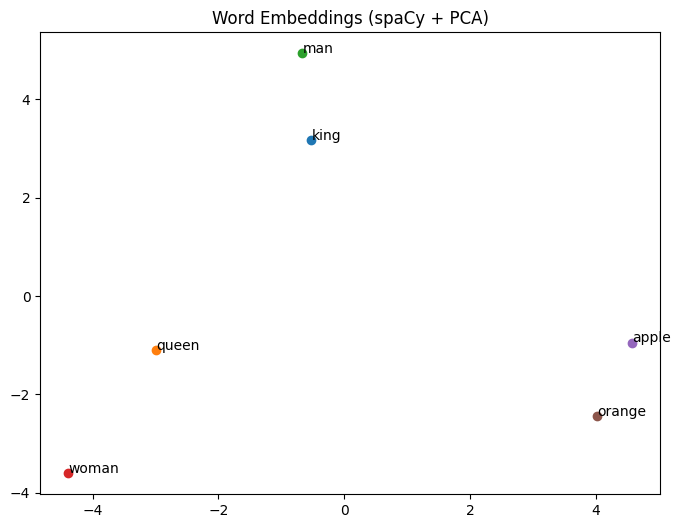

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

words = ["king", "queen", "man", "woman", "apple", "orange"]
vectors = [nlp(word).vector for word in words]

# Reduce dimensions
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    x, y = reduced[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word)
plt.title("Word Embeddings (spaCy + PCA)")
plt.show()
